In [146]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.gridspec as gridspec
from sklearn.model_selection import StratifiedShuffleSplit
import seaborn as sns
from sklearn import preprocessing

In [147]:
data = pd.read_csv("data/data_PE_no_lab_measurements_alpha.csv")

In [148]:
data

,Unnamed: 0,age,date_admit,sex,country,income,comorbid_aids_hiv,comorbid_asthma,comorbid_chronic_cardiac_disease,comorbid_chronic_haematological_disease,comorbid_chronic_kidney_disease,comorbid_chronic_neurological_disorder,comorbid_chronic_pulmonary_disease,comorbid_dementia,comorbid_diabetes,comorbid_hypertension,comorbid_immunosuppression,comorbid_liver_disease,comorbid_malignant_neoplasm,comorbid_malnutrition,comorbid_obesity,comorbid_rheumatologic_disorder,comorbid_smoking,comorbid_tuberculosis,symptomatic,symptoms_abdominal_pain,symptoms_altered_consciousness_confusion,symptoms_bleeding,symptoms_chest_pain,symptoms_conjunctivitis,symptoms_cough,symptoms_diarrhoea,symptoms_ear_pain,symptoms_fatigue_malaise,symptoms_headache,symptoms_history_of_fever,symptoms_lost_altered_sense_of_smell,symptoms_lost_altered_sense_of_taste,symptoms_lymphadenopathy,symptoms_muscle_aches_joint_pain,symptoms_runny_nose,symptoms_seizures,symptoms_severe_dehydration,symptoms_shortness_of_breath,symptoms_skin_rash,symptoms_sore_throat,symptoms_vomiting_nausea,symptoms_wheezing,treat_extracorporeal,treat_high_flow_nasal_cannula,treat_inhaled_nitric_oxide,treat_invasive_ventilation,treat_non_invasive_ventilation,treat_respiratory_support,treat_tracheostomy,treat_oxy,PE
0,294,49.0,2020-03,Male,Spain,High income,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,0
1,295,47.0,2020-03,Male,Spain,High income,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0
2,296,86.0,2020-03,Male,Spain,High income,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,0
3,297,77.0,2020-03,Male,Spain,High income,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,True,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,0
4,298,75.0,2020-03,Female,Spain,High income,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754197,800455,54.0,2020-03,Male,Spain,High income,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,True,1
754198,800456,56.0,2020-12,Female,Spain,High income,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,True,0
754199,800457,49.0,2020-03,Male,Spain,High income,False,False,False,False,False,False,False,False,False,False,False,True,False,

In [149]:
# Drop old index
data.drop('Unnamed: 0', axis=1, inplace=True)

In [150]:
data.columns

Index(['age', 'date_admit', 'sex', 'country', 'income', 'comorbid_aids_hiv',
       'comorbid_asthma', 'comorbid_chronic_cardiac_disease',
       'comorbid_chronic_haematological_disease',
       'comorbid_chronic_kidney_disease',
       'comorbid_chronic_neurological_disorder',
       'comorbid_chronic_pulmonary_disease', 'comorbid_dementia',
       'comorbid_diabetes', 'comorbid_hypertension',
       'comorbid_immunosuppression', 'comorbid_liver_disease',
       'comorbid_malignant_neoplasm', 'comorbid_malnutrition',
       'comorbid_obesity', 'comorbid_rheumatologic_disorder',
       'comorbid_smoking', 'comorbid_tuberculosis', 'symptomatic',
       'symptoms_abdominal_pain', 'symptoms_altered_consciousness_confusion',
       'symptoms_bleeding', 'symptoms_chest_pain', 'symptoms_conjunctivitis',
       'symptoms_cough', 'symptoms_diarrhoea', 'symptoms_ear_pain',
       'symptoms_fatigue_malaise', 'symptoms_headache',
       'symptoms_history_of_fever', 'symptoms_lost_altered_sense_o

In [151]:
date_series = pd.to_datetime(data['date_admit'])
indices = (date_series > '2020-01') & (date_series < '2022-02')
# Remove those patients admitted before pandemic
data = data.loc[indices]

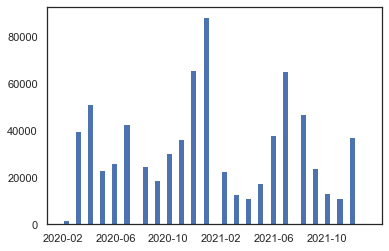

In [132]:
fig, ax = plt.subplots()
plt.hist(data.sort_values('date_admit')['date_admit'], bins=50)
every_nth = 4
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

In [152]:
# Encode sex, country, and income, and presence of alpha variant
le = preprocessing.LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['country'] = le.fit_transform(data['country'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)
data['income'] = data['income'].map({'High income':3, 'Upper middle income':2, 'Lower middle income':1, 'Low income':0})
data['alpha'] = pd.to_datetime(data['date_admit']) > '2020-12'
data = data.drop('date_admit', axis=1)

/var/folders/rb/zrr_wqjs59v2n19lg6kssgnw0000gr/T/ipykernel_51550/2968359307.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sex'] = le.fit_transform(data['sex'])
/var/folders/rb/zrr_wqjs59v2n19lg6kssgnw0000gr/T/ipykernel_51550/2968359307.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['country'] = le.fit_transform(data['country'])
/var/folders/rb/zrr_wqjs59v2n19lg6kssgnw0000gr/T/ipykernel_51550/2968359307.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

{'Argentina': 0, 'Australia': 1, 'Belgium': 2, 'Bolivia': 3, 'Brazil': 4, 'Canada': 5, 'Chile': 6, 'Colombia': 7, 'Estonia': 8, 'Few': 9, 'France': 10, 'Germany': 11, 'Gibraltar': 12, 'India': 13, 'Indonesia': 14, 'Ireland': 15, 'Israel': 16, 'Italy': 17, 'Japan': 18, 'Kuwait': 19, 'Lao PDR': 20, 'Malawi': 21, 'Malaysia': 22, 'Nepal': 23, 'Netherlands': 24, 'New Zealand': 25, 'Norway': 26, 'Pakistan': 27, 'Peru': 28, 'Poland': 29, 'Portugal': 30, 'Qatar': 31, 'Romania': 32, 'Russian Federation': 33, 'Saudi Arabia': 34, 'South Africa': 35, 'Spain': 36, 'Ukraine': 37, 'United Kingdom': 38, 'United States': 39}


In [153]:
# Convert boolean to binary variables
f = lambda x: 1 if x==True else 0
data.iloc[:, 4:] = data.iloc[:, 4:].applymap(f)

In [157]:
data['alpha'].value_counts()
data['alpha'].isnull().values.any()

False

In [135]:
data

,age,sex,country,income,comorbid_aids_hiv,comorbid_asthma,comorbid_chronic_cardiac_disease,comorbid_chronic_haematological_disease,comorbid_chronic_kidney_disease,comorbid_chronic_neurological_disorder,comorbid_chronic_pulmonary_disease,comorbid_dementia,comorbid_diabetes,comorbid_hypertension,comorbid_immunosuppression,comorbid_liver_disease,comorbid_malignant_neoplasm,comorbid_malnutrition,comorbid_obesity,comorbid_rheumatologic_disorder,comorbid_smoking,comorbid_tuberculosis,symptomatic,symptoms_abdominal_pain,symptoms_altered_consciousness_confusion,symptoms_bleeding,symptoms_chest_pain,symptoms_conjunctivitis,symptoms_cough,symptoms_diarrhoea,symptoms_ear_pain,symptoms_fatigue_malaise,symptoms_headache,symptoms_history_of_fever,symptoms_lost_altered_sense_of_smell,symptoms_lost_altered_sense_of_taste,symptoms_lymphadenopathy,symptoms_muscle_aches_joint_pain,symptoms_runny_nose,symptoms_seizures,symptoms_severe_dehydration,symptoms_shortness_of_breath,symptoms_skin_rash,symptoms_sore_throat,symptoms_vomiting_nausea,symptoms_wheezing,treat_extracorporeal,treat_high_flow_nasal_cannula,treat_inhaled_nitric_oxide,treat_invasive_ventilation,treat_non_invasive_ventilation,treat_respiratory_support,treat_tracheostomy,treat_oxy,PE,alpha
0,49.0,1,36,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,47.0,1,36,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,86.0,1,36,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,77.0,1,36,3,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,75.0,0,36,3,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754197,54.0,1,36,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0
754198,56.0,0,36,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0
754199,49.0,1,36,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,1,0,0
754200,71.0,1,36,3,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0


In [136]:
print(data['alpha'].value_counts())

1    390401
0    361876
Name: alpha, dtype: int64


In [137]:
# Missing values per feature
data.isnull().sum(axis = 0)

age                                         0
sex                                         0
country                                     0
income                                      0
comorbid_aids_hiv                           0
comorbid_asthma                             0
comorbid_chronic_cardiac_disease            0
comorbid_chronic_haematological_disease     0
comorbid_chronic_kidney_disease             0
comorbid_chronic_neurological_disorder      0
comorbid_chronic_pulmonary_disease          0
comorbid_dementia                           0
comorbid_diabetes                           0
comorbid_hypertension                       0
comorbid_immunosuppression                  0
comorbid_liver_disease                      0
comorbid_malignant_neoplasm                 0
comorbid_malnutrition                       0
comorbid_obesity                            0
comorbid_rheumatologic_disorder             0
comorbid_smoking                            0
comorbid_tuberculosis             

<AxesSubplot:>

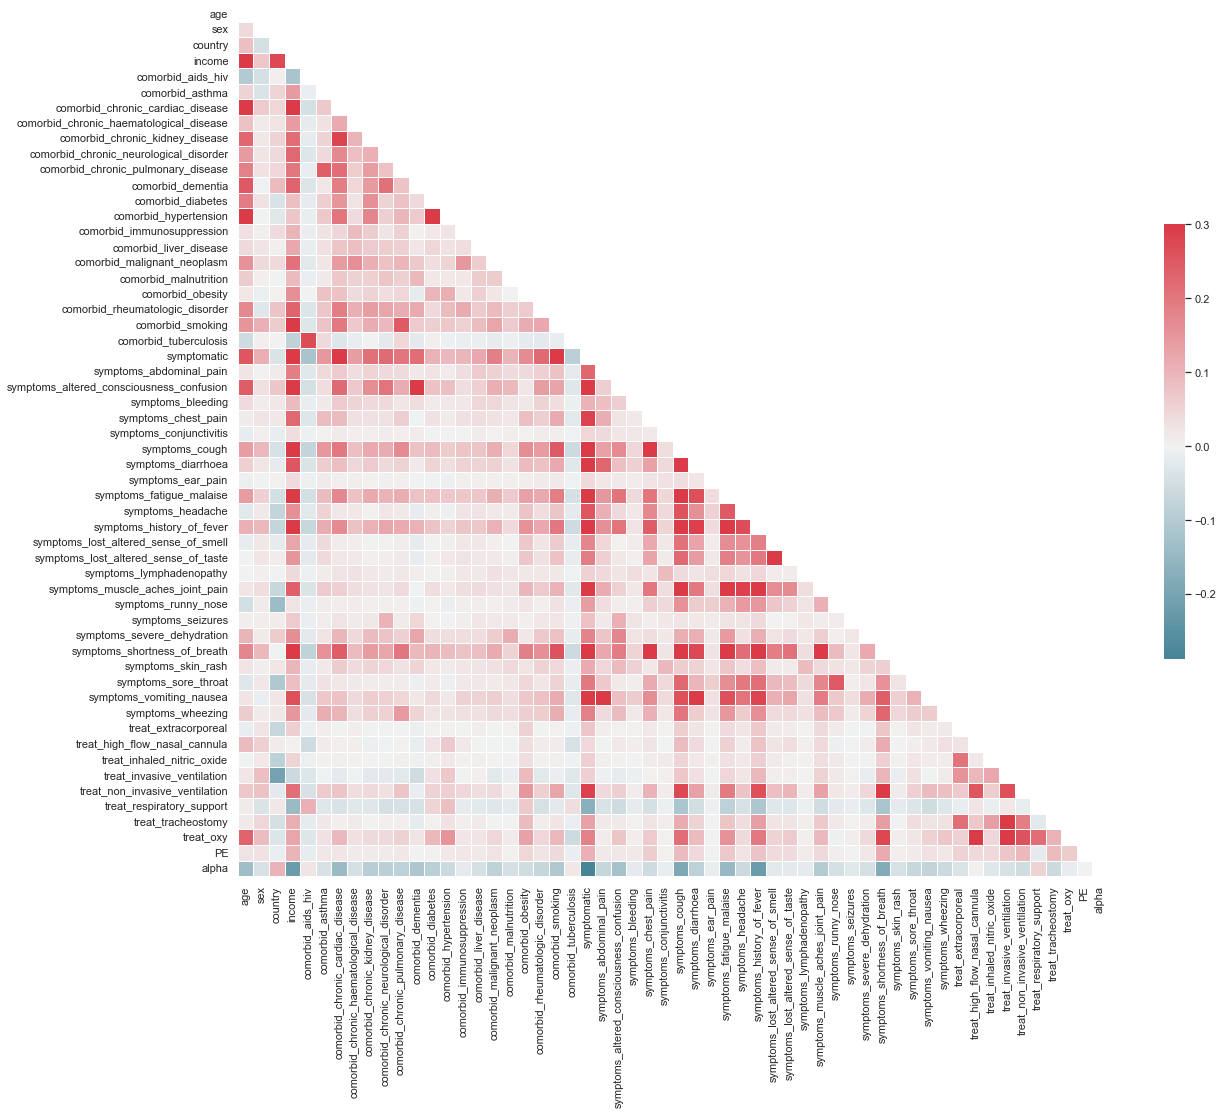

In [100]:
# Calculate and visualise correlation between variables 
plt.figure(figsize=(20,16))
sns.set(style="white")
corr = data.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax= .3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [101]:
# The top 55 correlation pairs printed
c = data.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")

print(so[2910:2970])

comorbid_chronic_kidney_disease           age                                         0.225235
age                                       comorbid_chronic_kidney_disease             0.225235
symptoms_abdominal_pain                   symptoms_diarrhoea                          0.226055
symptoms_diarrhoea                        symptoms_abdominal_pain                     0.226055
income                                    comorbid_dementia                           0.230080
comorbid_dementia                         income                                      0.230080
treat_oxy                                 age                                         0.230520
age                                       treat_oxy                                   0.230520
income                                    comorbid_rheumatologic_disorder             0.230555
comorbid_rheumatologic_disorder           income                                      0.230555
income                                    symptoms

In [102]:
# Get stratified split
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

X = data.drop('PE', axis=1, inplace=False).to_numpy()
y = data['PE'].to_numpy()

sss.get_n_splits(X, y)

for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 47298 224698 662159 ... 279075 167414 631391] TEST: [464410 442601 425876 ... 347444 455694 192739]


In [103]:
# If you do not want it stratified.
# selected_rows = data[~data.isnull().any(axis=1)]

# #Get test set (20% of original dataset)

# # get random sample 
# test = selected_rows.sample(n=round(0.2*766823), axis=0)

# # get everything but the test sample
# train = selected_rows.drop(index=test.index)

In [104]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((601821, 55), (150456, 55), (601821,), (150456,))

In [105]:
np.save('X_train_PE_no_lab_measurement_alpha', X_train)
np.save('X_test_PE_no_lab_measurement_alpha', X_test)
np.save('y_train_PE_no_lab_measurement_alpha', y_train)
np.save('y_test_PE_no_lab_measurement_alpha', y_test)

# Combine UK and Spain for training, separate for testing

In [158]:
data_UK = pd.read_csv("data/data_PE_no_lab_measurements_UK_alpha.csv")
data_Spain = pd.read_csv("data/data_PE_no_lab_measurements_Spain_alpha.csv")

# Drop old index and country
data_UK.drop('Unnamed: 0', axis=1, inplace=True)
data_UK.drop('comorbid_tuberculosis', axis=1, inplace=True)
data_UK.drop('comorbid_immunosuppression', axis=1, inplace=True)
data_Spain.drop('Unnamed: 0', axis=1, inplace=True)
data_Spain.drop('comorbid_tuberculosis', axis=1, inplace=True)
data_Spain.drop('comorbid_immunosuppression', axis=1, inplace=True)

date_series = pd.to_datetime(data_UK['date_admit'])
indices = (date_series > '2020-01') & (date_series < '2022-02')
# Remove those patients admitted before pandemic
data_UK = data_UK.loc[indices]

date_series = pd.to_datetime(data_Spain['date_admit'])
indices = (date_series > '2020-01') & (date_series < '2022-02')
# Remove those patients admitted before pandemic
data_Spain = data_Spain.loc[indices]

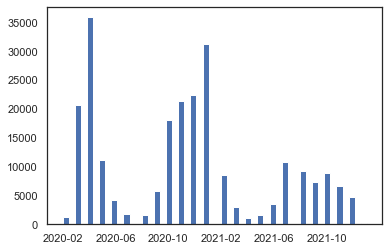

In [141]:
fig, ax = plt.subplots()
plt.hist(data_UK.sort_values('date_admit')['date_admit'], bins=50)
every_nth = 4
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

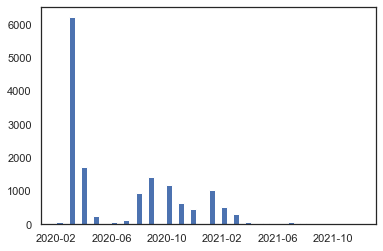

In [142]:
fig, ax = plt.subplots()
plt.hist(data_Spain.sort_values('date_admit')['date_admit'], bins=50)
every_nth = 4
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

In [159]:
# Encode sex
data_UK['sex'] = data_UK['sex'].map({'Male':1, 'Female':0})
data_Spain['sex'] = data_Spain['sex'].map({'Male':1, 'Female':0})
# Encode country
data_UK['country'] = data_UK['country'].map({'Spain':1, 'United Kingdom':0})
data_Spain['country'] = data_Spain['country'].map({'Spain':1, 'United Kingdom':0})
# Encode age
data_UK['agegp10'] = data_UK['agegp10'].map({'[80,120)':4, '[60,80)':3, '[40,60)':2, '[20,40)':1, '[0,20)':0})
data_Spain['agegp10'] = data_Spain['agegp10'].map({'[80,120)':4, '[60,80)':3, '[40,60)':2, '[20,40)':1, '[0,20)':0})
# Encode alpha variant presence
data_UK['alpha'] = pd.to_datetime(data_UK['date_admit']) > '2020-12'
data_UK = data_UK.drop('date_admit', axis=1)
data_Spain['alpha'] = pd.to_datetime(data_Spain['date_admit']) > '2020-12'
data_Spain = data_Spain.drop('date_admit', axis=1)

In [160]:
datum = pd.concat([data_UK,data_Spain], axis=1).to_csv('PE_alpha.csv', index=False) 

In [163]:
data['PE'].value_counts()

0    746687
1      5590
Name: PE, dtype: int64

In [164]:
data['PE'].isnull().values.any()

False

In [145]:
data_UK

,agegp10,sex,country,comorbid_aids_hiv,comorbid_asthma,comorbid_chronic_cardiac_disease,comorbid_chronic_haematological_disease,comorbid_chronic_kidney_disease,comorbid_chronic_neurological_disorder,comorbid_chronic_pulmonary_disease,comorbid_dementia,comorbid_diabetes,comorbid_hypertension,comorbid_liver_disease,comorbid_malignant_neoplasm,comorbid_malnutrition,comorbid_obesity,comorbid_rheumatologic_disorder,comorbid_smoking,symptomatic,symptoms_abdominal_pain,symptoms_altered_consciousness_confusion,symptoms_bleeding,symptoms_chest_pain,symptoms_conjunctivitis,symptoms_cough,symptoms_diarrhoea,symptoms_ear_pain,symptoms_fatigue_malaise,symptoms_headache,symptoms_history_of_fever,symptoms_lost_altered_sense_of_smell,symptoms_lost_altered_sense_of_taste,symptoms_lymphadenopathy,symptoms_muscle_aches_joint_pain,symptoms_runny_nose,symptoms_seizures,symptoms_severe_dehydration,symptoms_shortness_of_breath,symptoms_skin_rash,symptoms_sore_throat,symptoms_vomiting_nausea,symptoms_wheezing,PE,alpha
0,4,1,0,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False
1,4,0,0,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,4,1,0,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,4,0,0,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,1,1,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254160,3,0,0,False,False,False,True,False,True,True,False,True,True,False,True,False,True,False,True,True,True,True,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False
254161,4,1,0,False,False,True,True,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
254162,4,1,0,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
254163,4,0,0,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False


In [112]:
features = ['Age', 'Sex', 'Country', 'AIDS', 'Asthma',
       'Chronic cardiac disease',
       'Chronic haematological disease',
       'Chronic kidney disease',
       'Chronic neurological disorder',
       'Chronic pulmonary disease', 'Dementia',
       'Diabetes', 'Hypertension', 'Liver disease',
       'Malignant neoplasm', 'Malnutrition',
       'Obesity', 'Rheumatologic disorder',
       'Smoking', 'Symptomatic',
       'Abdominal pain', 'Confusion',
       'Bleeding', 'Chest pain', 'Conjunctivitis',
       'Cough', 'Diarrhoea', 'Ear pain',
       'Fatigue malaise', 'Headache',
       'Fever', 'Lost or altered sense of smell',
       'Lost or altered sense of taste', 'Lymphadenopathy',
       'Muscle aches or joint pain', 'Runny nose',
       'Seizures', 'Severe dehydration',
       'Shortness of breath', 'Skin rash',
       'Sore throat', 'Vomiting or nausea', 'Wheezing', 'PE', 'alpha']

In [113]:
# Convert boolean to binary variables
f = lambda x: 1 if x==True else 0
data_UK.iloc[:, 3:] = data_UK.iloc[:, 3:].applymap(f)
data_Spain.iloc[:, 3:] = data_Spain.iloc[:, 3:].applymap(f)

In [114]:
data = pd.concat([data_UK, data_Spain])
data.columns = features

In [115]:
data

,Age,Sex,Country,AIDS,Asthma,Chronic cardiac disease,Chronic haematological disease,Chronic kidney disease,Chronic neurological disorder,Chronic pulmonary disease,...,Runny nose,Seizures,Severe dehydration,Shortness of breath,Skin rash,Sore throat,Vomiting or nausea,Wheezing,PE,alpha
0,4,1,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,4,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15203,2,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
15204,2,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
15205,2,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
15206,3,1,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


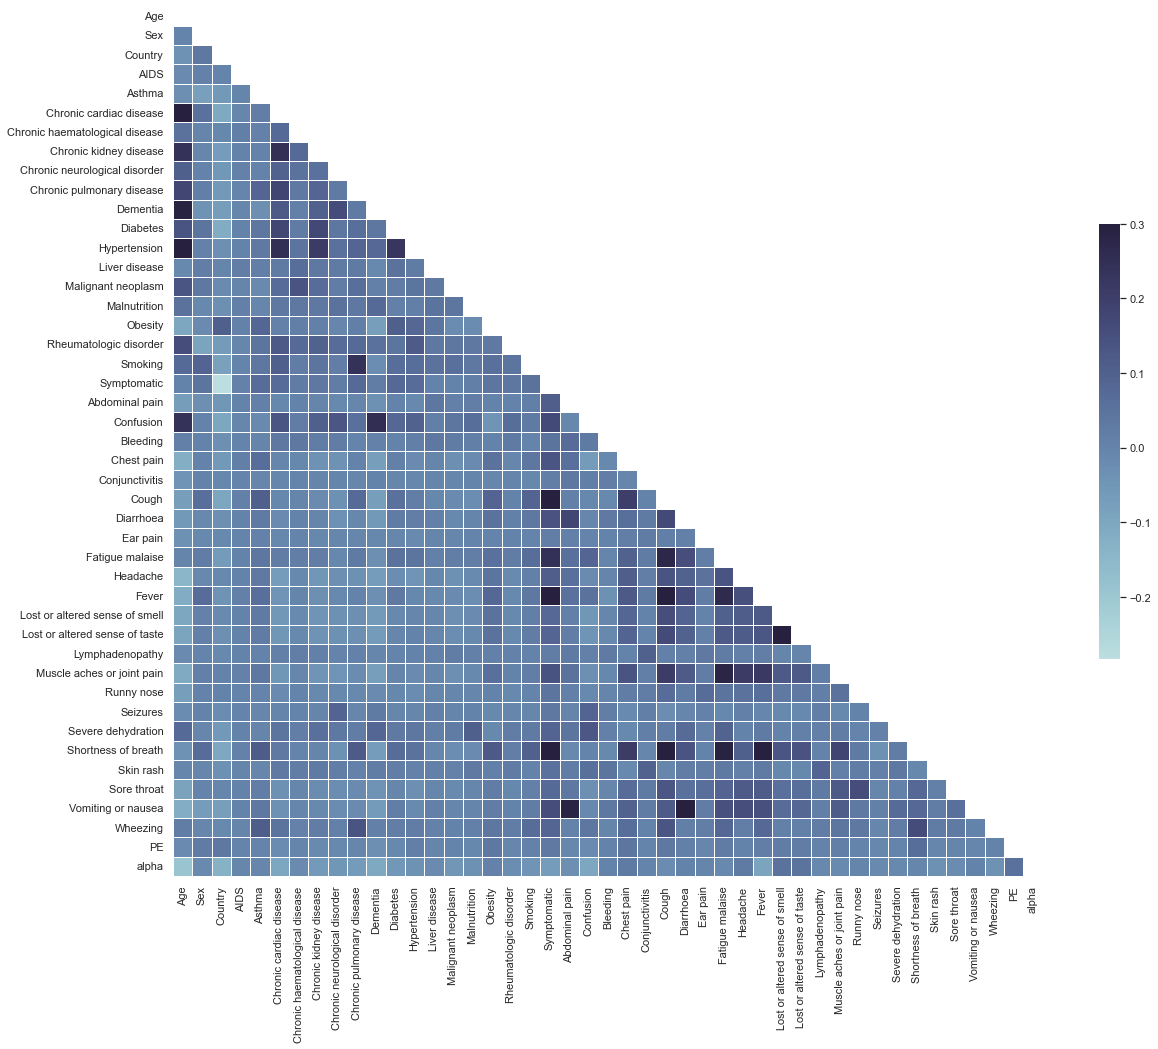

In [117]:
# Calculate and visualise correlation between variables 
plt.figure(figsize=(20,16))
sns.set(style="white")
corr = data.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax= .3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig('Correlation_SpainUK_alpha.png', dpi=600, bbox_inches='tight')

<AxesSubplot:>

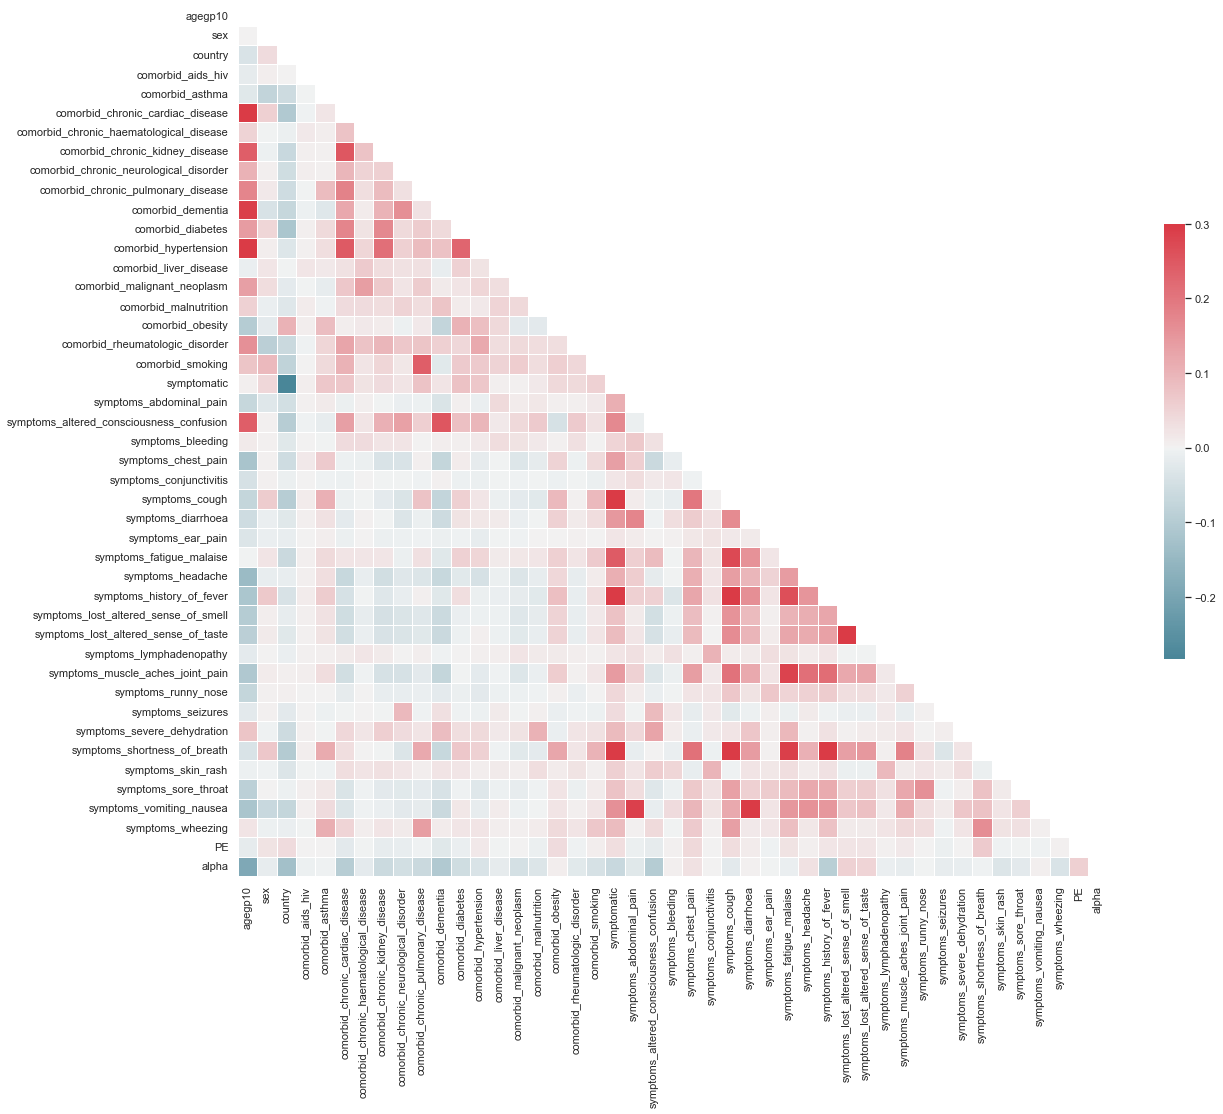

In [118]:
# Calculate and visualise correlation between variables 
plt.figure(figsize=(20,16))
sns.set(style="white")
corr = pd.concat([data_UK, data_Spain]).corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax= .3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [119]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
corr

,agegp10,sex,country,comorbid_aids_hiv,comorbid_asthma,comorbid_chronic_cardiac_disease,comorbid_chronic_haematological_disease,comorbid_chronic_kidney_disease,comorbid_chronic_neurological_disorder,comorbid_chronic_pulmonary_disease,comorbid_dementia,comorbid_diabetes,comorbid_hypertension,comorbid_liver_disease,comorbid_malignant_neoplasm,comorbid_malnutrition,comorbid_obesity,comorbid_rheumatologic_disorder,comorbid_smoking,symptomatic,symptoms_abdominal_pain,symptoms_altered_consciousness_confusion,symptoms_bleeding,symptoms_chest_pain,symptoms_conjunctivitis,symptoms_cough,symptoms_diarrhoea,symptoms_ear_pain,symptoms_fatigue_malaise,symptoms_headache,symptoms_history_of_fever,symptoms_lost_altered_sense_of_smell,symptoms_lost_altered_sense_of_taste,symptoms_lymphadenopathy,symptoms_muscle_aches_joint_pain,symptoms_runny_nose,symptoms_seizures,symptoms_severe_dehydration,symptoms_shortness_of_breath,symptoms_skin_rash,symptoms_sore_throat,symptoms_vomiting_nausea,symptoms_wheezing,PE,alpha
agegp10,1.000000,0.000911,-0.038657,-0.017048,-0.027226,0.338203,0.051093,0.239164,0.102250,0.176472,0.290535,0.140572,0.302452,-0.010553,0.134332,0.053123,-0.098787,0.156804,0.073872,0.005636,-0.073220,0.239269,0.011682,-0.120835,-0.043052,-0.073754,-0.055684,-0.033551,-0.002182,-0.143935,-0.116139,-0.100504,-0.089603,-0.019695,-0.108435,-0.074145,-0.022663,0.072723,-0.037389,-0.006182,-0.087140,-0.118799,0.022551,-0.016725,-0.189898
sex,0.000911,1.000000,0.037404,0.007163,-0.079316,0.055717,-0.001871,-0.007325,0.004617,0.013822,-0.041018,0.045506,0.008211,0.017846,0.034434,-0.009966,-0.020222,-0.089691,0.091359,0.042755,-0.029847,0.003225,0.002278,0.002830,0.001739,0.062211,-0.011875,-0.009981,0.022938,-0.013023,0.067511,0.006319,0.012563,0.000044,0.010776,0.002811,0.001761,-0.004710,0.069130,-0.003664,0.001205,-0.064478,-0.007344,0.026706,-0.014416
country,-0.038657,0.037404,1.000000,-0.000338,-0.058595,-0.107449,-0.008796,-0.066159,-0.052949,-0.056565,-0.072882,-0.116364,-0.030402,-0.002813,-0.020835,-0.029300,0.102316,-0.062109,-0.081018,-0.282884,-0.049744,-0.097609,-0.027129,-0.056589,-0.008230,-0.097475,-0.027810,-0.012218,-0.064145,-0.013951,-0.041107,-0.016033,-0.025917,-0.011625,0.004526,0.005522,-0.022358,-0.058336,-0.101693,-0.032590,-0.007348,-0.073457,-0.009719,0.037841,-0.128713
comorbid_aids_hiv,-0.017048,0.007163,-0.000338,1.000000,-0.000663,-0.003717,0.013387,0.004401,0.006926,-0.002465,-0.007002,0.006111,0.003173,0.018613,-0.002726,0.010112,0.007190,-0.004608,0.000361,0.008400,0.002710,-0.003205,0.000630,0.013684,0.000091,0.010612,0.005078,0.000086,0.004926,0.006104,0.010546,0.005648,0.001840,0.002413,0.006961,-0.000488,-0.000145,0.003089,0.007941,-0.002240,0.004296,0.004574,-0.002357,0.000570,-0.006755
comorbid_asthma,-0.027226,-0.079316,-0.058595,-0.000663,1.000000,0.019424,0.007971,0.003405,0.003826,0.087068,-0.029251,0.038827,0.032426,0.015038,-0.016389,-0.003147,0.083848,0.045925,0.039769,0.069762,0.011583,-0.015873,-0.001192,0.064848,-0.003990,0.105963,0.027774,0.006885,0.038782,0.031912,0.062020,0.028120,0.025110,0.004785,0.034866,0.000585,-0.006742,-0.002519,0.114996,-0.002873,0.015687,0.036273,0.110728,0.001366,-0.004589
comorbid_chronic_cardiac_disease,0.338203,0.055717,-0.107449,-0.003717,0.019424,1.000000,0.075927,0.249963,0.095676,0.181297,0.121977,0.176005,0.245986,0.028952,0.069928,0.037960,0.007263,0.125726,0.102655,0.068504,-0.008924,0.135146,0.035970,-0.005950,-0.005471,-0.009451,-0.019891,-0.008780,0.020802,-0.070117,-0.043384,-0.054906,-0.051982,0.012603,-0.052159,-0.017845,-0.000554,0.044331,0.032510,0.032277,-0.034723,-0.034621,0.047317,-0.022839,-0.097151
comorbid_chronic_haematological_disease,0.051093,-0.001871,-0.008796,0.013387,0.007971,0.075927,1.000000,0.074625,0.050942,0.031830,0.009667,0.026574,0.046228,0.063733,0.137560,0.037406,0.014735,0.076269,0.019957,0.024787,0.004811,0.021765,0.036103,-0.008151,-0.000370,-0.002402,0.003307,0.000456,0.018173,-0.012218,-0.000588,-0.015536,-0.011773

In [120]:
# Get the test sets for UK, Spain, UK+Spain
# Get stratified split
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

X_UK = data_UK.drop('PE', axis=1, inplace=False).to_numpy()
y_UK = data_UK['PE'].to_numpy()

sss.get_n_splits(X_UK, y_UK)

for train_index, test_index in sss.split(X_UK, y_UK):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_UK, X_test_UK = X_UK[train_index], X_UK[test_index]
    y_train_UK, y_test_UK = y_UK[train_index], y_UK[test_index]
    
X_Spain = data_Spain.drop('PE', axis=1, inplace=False).to_numpy()
y_Spain = data_Spain['PE'].to_numpy()

sss.get_n_splits(X_Spain, y_Spain)

for train_index, test_index in sss.split(X_Spain, y_Spain):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_Spain, X_test_Spain = X_Spain[train_index], X_Spain[test_index]
    y_train_Spain, y_test_Spain = y_Spain[train_index], y_Spain[test_index]

TRAIN: [ 56433  29685 220925 ...  92401 135564 143685] TEST: [ 82509  76019 237559 ...  47157  91744 163431]
TRAIN: [  179  5607 11847 ...  9653  4955 13996] TEST: [ 3137  3854  9609 ... 11429  7334  4904]


In [121]:
# Get the training and test sets for the model combining both
X_train = np.concatenate((X_train_UK, X_train_Spain), axis=0)
y_train = np.concatenate((y_train_UK, y_train_Spain), axis=0)

X_test = np.concatenate((X_test_UK, X_test_Spain), axis=0)
y_test = np.concatenate((y_test_UK, y_test_Spain), axis=0)

In [122]:
np.save('X_test_PE_no_lab_measurement_UK_alpha', X_test_UK)
np.save('y_test_PE_no_lab_measurement_UK_alpha', y_test_UK)
np.save('X_test_PE_no_lab_measurement_Spain_alpha', X_test_Spain)
np.save('y_test_PE_no_lab_measurement_Spain_alpha', y_test_Spain)
np.save('X_train_PE_no_lab_measurement_UKSpain_alpha', X_train)
np.save('y_train_PE_no_lab_measurement_UKSpain_alpha', y_train)
np.save('X_test_PE_no_lab_measurement_UKSpain_alpha', X_test)
np.save('y_test_PE_no_lab_measurement_UKSpain_alpha', y_test)